In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [331]:
cab_d = pd.read_csv(r'C:\Users\Tekno\Desktop\Data-Science-git\week-2\DataSets\Cab_Data.csv')

In [332]:
Trans_id = pd.read_csv(r'C:\Users\Tekno\Desktop\Data-Science-git\week-2\DataSets\Transaction_ID.csv')

In [333]:
cus_id = pd.read_csv(r'C:\Users\Tekno\Desktop\Data-Science-git\week-2\DataSets\Customer_ID.csv')

In [334]:
city = pd.read_csv(r'C:\Users\Tekno\Desktop\Data-Science-git\week-2\DataSets\City.csv')

In [360]:
cab_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [336]:
Trans_id.head(2)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card


We can observe that we have the same primary key in both transactional and cab data hence we merge them together 

In [337]:
cab_df = cab_d.merge(Trans_id, left_on ='Transaction ID',right_on ='Transaction ID', how ='right')

In [338]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


We need to work on the date and convert to a standard datae format

In [339]:
import datetime
cab_df['Date_of_Travel'] = datetime.datetime(1899, 12, 30) + pd.to_timedelta(cab_df['Date of Travel'], unit='D')

In [340]:
cab_df.drop(columns = ['Date of Travel'], inplace=True)

In [341]:
cab_df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Date_of_Travel
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,2016-01-08
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,2016-01-06
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,2016-01-02
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,2016-01-07
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,2016-01-03


Create a new column for profit margin

In [342]:
cab_df['Profit'] = (cab_df['Price Charged'] - cab_df['Cost of Trip'])  

In [343]:
cab_df.head(1)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Date_of_Travel,Profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,2016-01-08,57.315


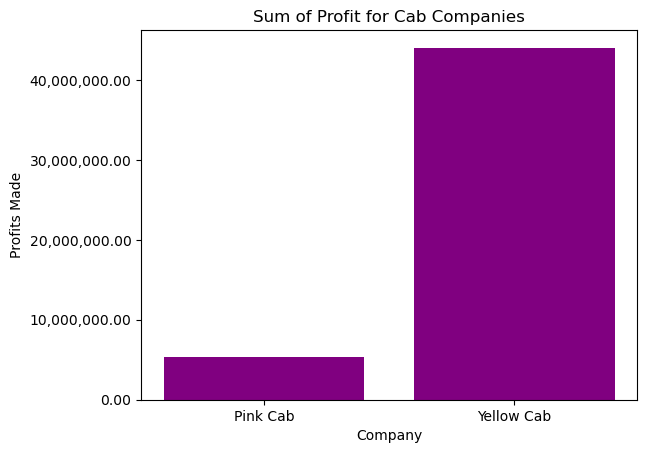

In [344]:
f_df = cab_df[cab_df['Company'].isin(['Pink Cab', 'Yellow Cab'])]

# Calculate the sum of the Value column
sums = f_df.groupby('Company')['Profit'].sum()
plt.bar(sums.index, sums.values, color='purple')
# Plot the sum
#plt.bar(['Pink Cab', 'Yellow Cab'], [sum_value, sum_value])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x)))
# Add labels and title
plt.xlabel('Company')
plt.ylabel('Profits Made')
plt.title('Sum of Profit for Cab Companies')

# Show the plot
plt.show()

##### Yellow Cab proves to be more successful and has made up to 729% more profit over the past 2 years than Pink Cab

In [345]:
sums

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

We Proceed to Value count the Payment methods

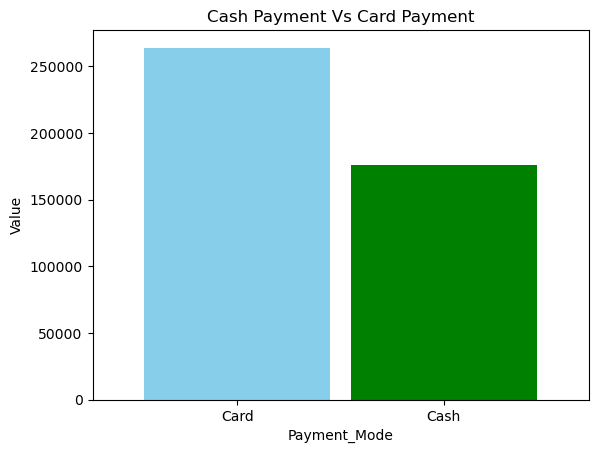

In [138]:
value_counts = cab_df['Payment_Mode'].value_counts()

# Plot the bar chart
value_counts.plot(kind='bar', color=['skyblue','green'],width=0.9)
plt.xticks(rotation=0) # this makes the labesls on the axis more horizontal than vertical

#cab_df.plot(kind='bar', x='Payment_Mode', y='Value', legend=False, color='skyblue')

# Add labels and title
plt.xlabel('Payment_Mode')
plt.ylabel('Value')
plt.title('Cash Payment Vs Card Payment')

# Show the plot
plt.show()

#### We have more users opting for card payment than cash payment. at a ratio of 3 to 2 This means that more users have a preference for cashless payment  

In [98]:
cab_df['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [313]:
city.head(2)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


Convert the values to numeric by removing the commas

In [314]:
city['Users'] = city['Users'].str.replace(',' ,'').astype(float) # convert object data to numeric for the purpose analysis

In [315]:
city['Population'] = city['Population'].str.replace(',','').astype(float)

In [316]:
city.head(4)

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0


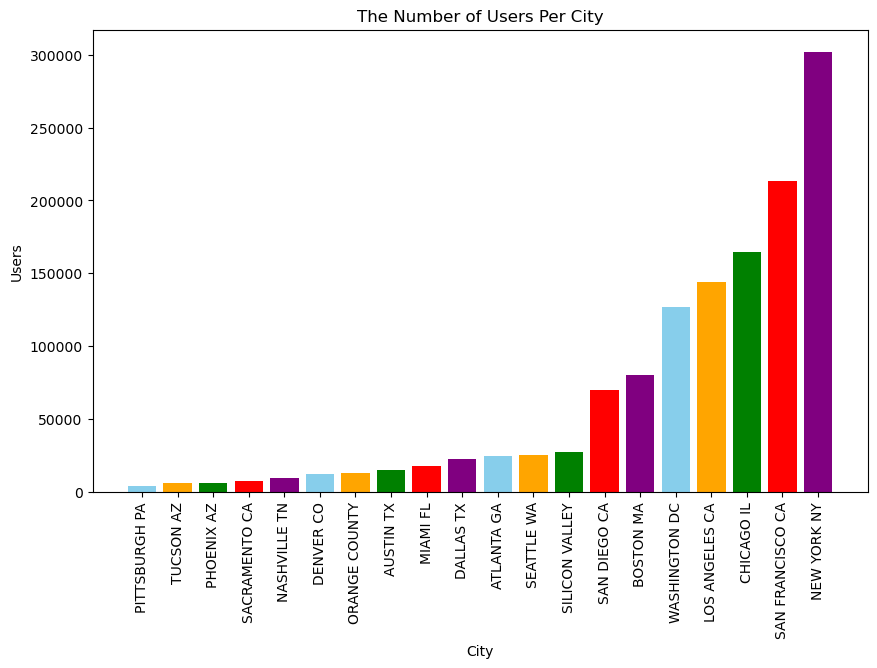

In [176]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))

plt.bar(city_sorted['City'], city_sorted['Users'], color=colors)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Users')
plt.title('The Number of Users Per City')
plt.xticks(rotation=90)
# Show the plot
plt.show()

We can observe the top 5 performing cities above are New York, San fransisco, Chicago,Los Angeles, Washington

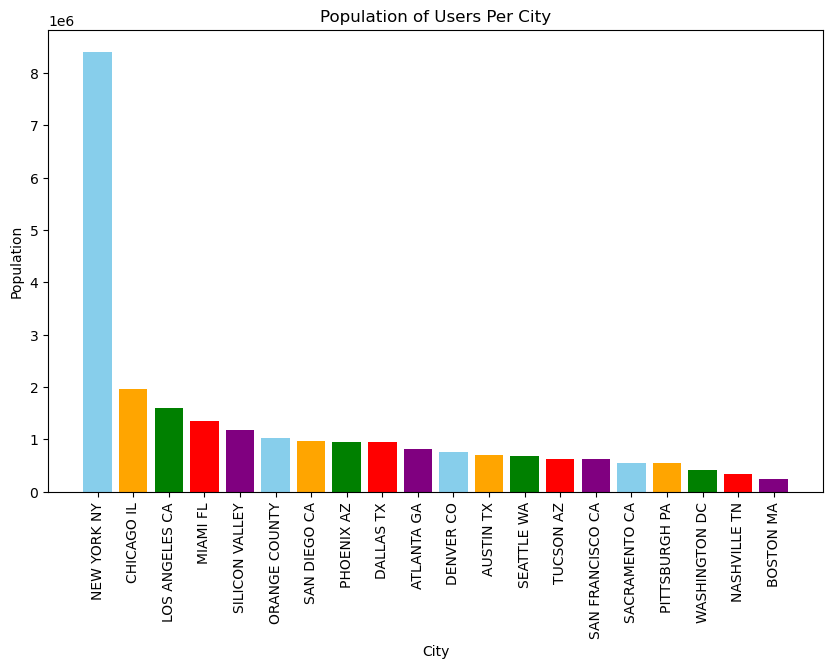

In [317]:
city_sorted = city_sorted.sort_values(by='Population', ascending=False)

# Define colors for each bar
colors = ['skyblue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
plt.bar(city_sorted['City'], city_sorted['Population'], color=colors)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Population')
plt.title('Population of Users Per City')

# Rotate x-axis labels horizontally
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### We can observe that the states with the higest population in millions do not all reflect the highest number of cab users in totality

In [157]:
mean_profit_by_state = cab_df.groupby(["Company", "City"])["Profit"].mean().sort_values(ascending=False)

In [318]:
mean_profit_by_state.head()

Company     City          
Yellow Cab  NEW YORK NY       307.864252
            SILICON VALLEY    206.788383
            DALLAS TX         195.849415
            DENVER CO         146.853175
            ORANGE COUNTY     143.785355
Name: Profit, dtype: float64

We created a summary of margins for each city and company and will visualise it below

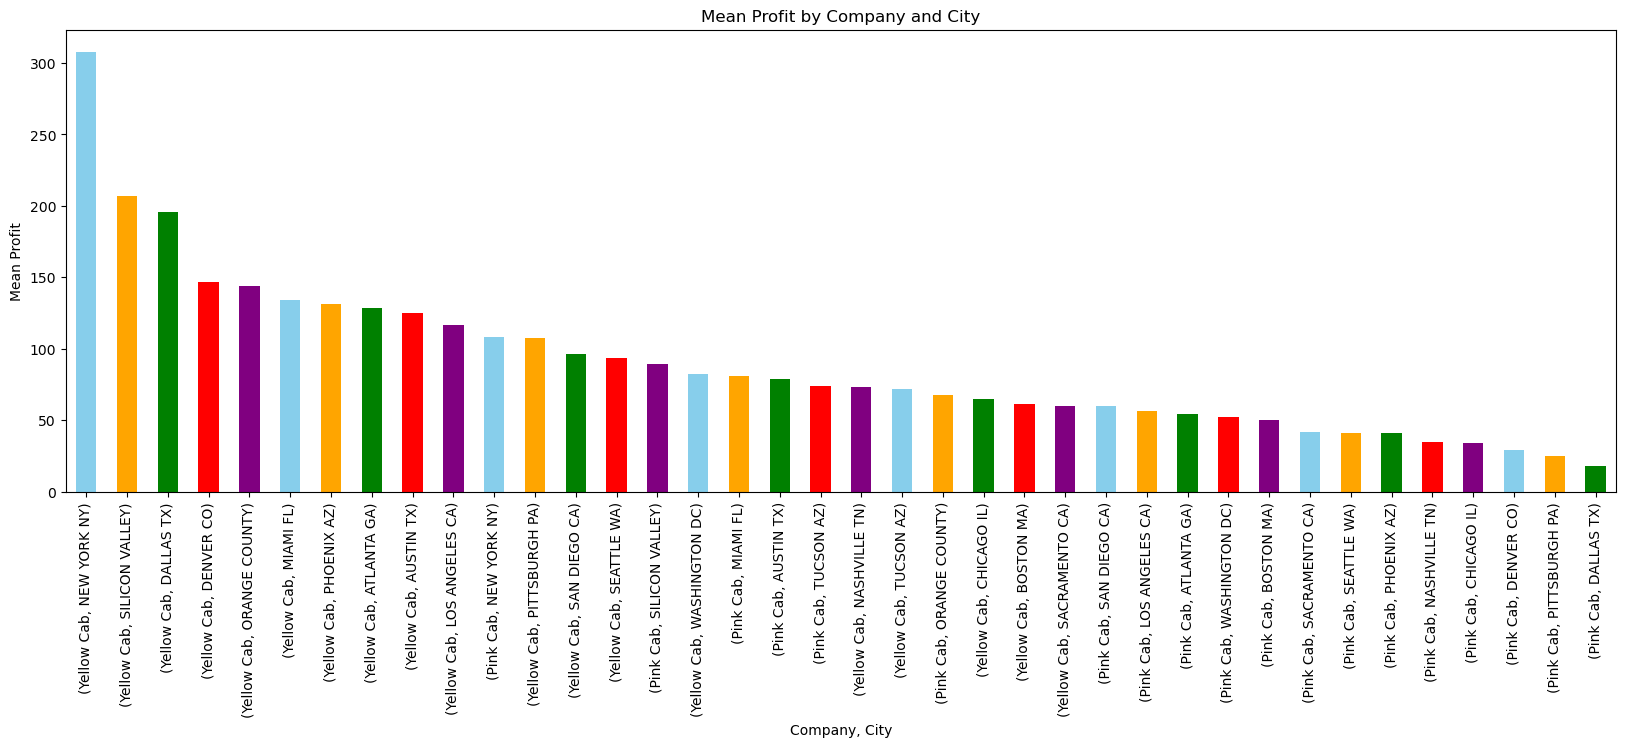

In [166]:
mean_profit_by_state = cab_df.groupby(["Company", "City"])["Profit"].mean().sort_values(ascending=False)
colors = ['skyblue', 'orange', 'green', 'red', 'purple']
# Plot the graph
plt.figure(figsize=(20, 6))
mean_profit_by_state.plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Company, City')
plt.ylabel('Mean Profit')
plt.title('Mean Profit by Company and City')

# Show the plot
plt.show()

Observe how Yello cab make sthe most profit in New York, Silicon Valey, Dallas texas, Denver, orange county,Miami,Phoenix,Atlanta Austin and Lost angeles meaning that the top 10 Busiests cities are controlled by Yellow Cap Company

Below, we created a summary of margins for each city

In [266]:
mean_profit_by_city = cab_df.groupby(["City"])["Profit"].mean().sort_values(ascending=False)

In [272]:
mean_profit_by_city.head(2)

City
NEW YORK NY    279.947491
DALLAS TX      160.856957
Name: Profit, dtype: float64

We peoceed to convert the groupby data into a data frame and merge new data from City

In [275]:
mpc = mean_profit_by_city.reset_index()

In [277]:
mpc.head(2)

,index,City,Profit
0,0,NEW YORK NY,279.947491
1,1,DALLAS TX,160.856957


In [286]:
city_users = mpc.merge(city, left_on ='City',right_on ='City', how ='left')

In [288]:
city_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       19 non-null     int64  
 1   City        19 non-null     object 
 2   Profit      19 non-null     float64
 3   Population  19 non-null     object 
 4   Users       19 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 912.0+ bytes


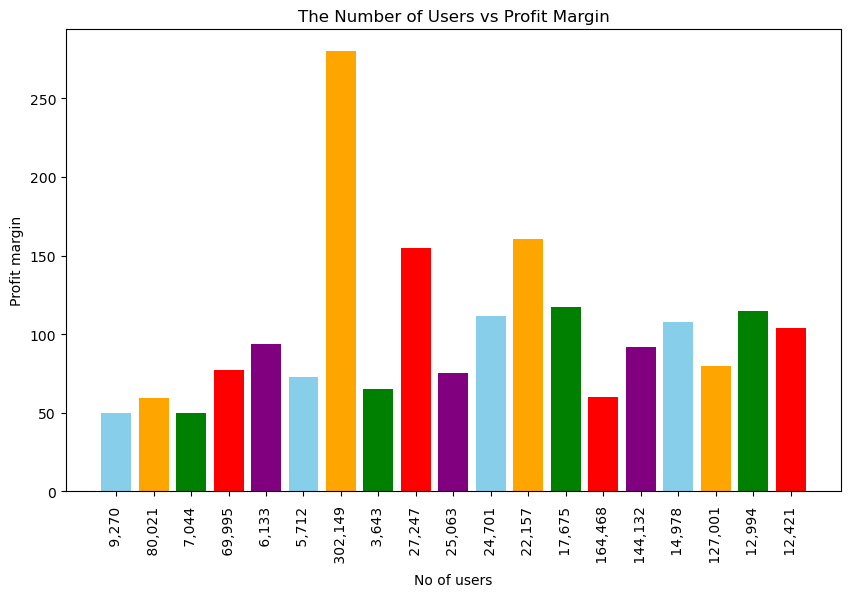

In [305]:
city_user_srt = city_users_srt.sort_values(by='Users', ascending=False)

colors = ['skyblue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))

plt.bar(city_user_srt['Users'], city_user_srt['Profit'], color=colors)

# Add labels and title
plt.xlabel('No of users')
plt.ylabel('Profit margin')
plt.title('The Number of Users vs Profit Margin')
plt.xticks(rotation=90)
# Show the plot
plt.show()

We can see from the above graphical representation that profit margin is not guarantted to increase with an increase in the number of users. We should also note that each city has its own perculairity and its own cab demands 

#### We proceed to create different age brackets for users according to their age and analyse it with their cities and income

In [320]:
# Define age brackets
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']

# Convert 'Age' column to numerical data
cus_id['Age_Bracket'] = pd.to_numeric(cus_id['Age'], errors='coerce')

# Remove rows with NaN (if any) after conversion
cus_idf = cus_id.dropna(subset=['Age_Bracket'])

# Assign each person to their respective age bracket
cus_idf['Age_Bracket'] = pd.cut(cus_idf['Age'], bins=age_bins, labels=age_labels)

# Calculate the mean income for each age bracket
mean_income_by_age = cus_idf.groupby('Age_Bracket')['Income (USD/Month)'].mean()


In [321]:
miba = mean_income_by_age.reset_index()

In [327]:
miba 

,Age_Bracket,Income (USD/Month)
0,20-29,15068.513319
1,30-39,14990.544806
2,40-49,14976.145116
3,50-59,15015.704353
4,60-69,15067.954910


the income form these age brackets are alomst at par


#### Examining the Information on users

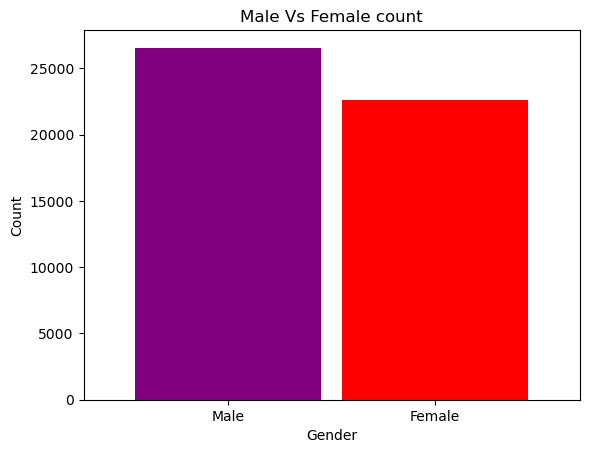

In [328]:

value_counts = cus_id['Gender'].value_counts()

# Plot the bar chart
value_counts.plot(kind='bar', color=['Purple','red'],width=0.9)
plt.xticks(rotation=0) # this makes the labesls on the axis more horizontal than vertical

#cab_df.plot(kind='bar', x='Payment_Mode', y='Value', legend=False, color='skyblue')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Male Vs Female count')

# Show the plot
plt.show()

#### More Male than femal cab users 

At this juncture we want to ascertain if more profit is made at certain times of the year than other times by creating a new column called seasons and partitioning the date time into various seasons of the year

In [260]:
def all_seasons(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Create new column 'Season' based on 'Date'
cab_df['Season'] = cab_df['Date_of_Travel'].dt.month.apply(all_seasons)


In [264]:
cab_df.head(2)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Date_of_Travel,Profit,Season
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,2016-01-08,57.315,Winter
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,2016-01-06,23.666,Winter


#### We aim to investigate if there is a Seasonality on profit margin

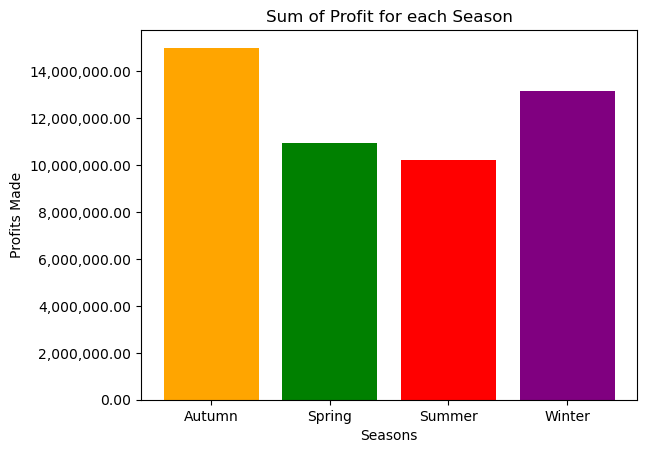

In [329]:
profit_season_df = cab_df[cab_df['Season'].isin(['Winter', 'Summer','Autumn','Spring'])]
colors = ['orange', 'green', 'red', 'purple']
# Calculate the sum of the Value column
sums = profit_season_df.groupby('Season')['Profit'].sum()
plt.bar(sums.index, sums.values, color=colors)
# Plot the sum
#plt.bar(['Pink Cab', 'Yellow Cab'], [sum_value, sum_value])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x)))
# Add labels and title
plt.xlabel('Seasons')
plt.ylabel('Profits Made')
plt.title('Sum of Profit for each Season')

# Show the plot
plt.show()

Autumn is the season with the highest profit margin followed by Winter with summer making the the least margin

Merge some more data

In [357]:
cab_data = cab_df.merge(cus_id, left_on ='Customer ID',right_on ='Customer ID', how ='right')

In [358]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      440098 non-null  int64         
 1   Company             359392 non-null  object        
 2   City                359392 non-null  object        
 3   KM Travelled        359392 non-null  float64       
 4   Price Charged       359392 non-null  float64       
 5   Cost of Trip        359392 non-null  float64       
 6   Customer ID         440098 non-null  int64         
 7   Payment_Mode        440098 non-null  object        
 8   Date_of_Travel      359392 non-null  datetime64[ns]
 9   Profit              359392 non-null  float64       
 10  Gender              440098 non-null  object        
 11  Age                 440098 non-null  int64         
 12  Income (USD/Month)  440098 non-null  int64         
dtypes: datetime64[ns](1), float64

In [363]:
cab_data.dropna(subset=['Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Date_of_Travel', 'Profit'], inplace=True)

In [364]:
cab_data.isna().sum()

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Date_of_Travel        0
Profit                0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [367]:
cab_data.to_csv(r'C:\Users\Tekno\Downloads\Dowloads\cab_data.csv', index=False)

Text(0.5, 1.0, 'Scatter Plot')

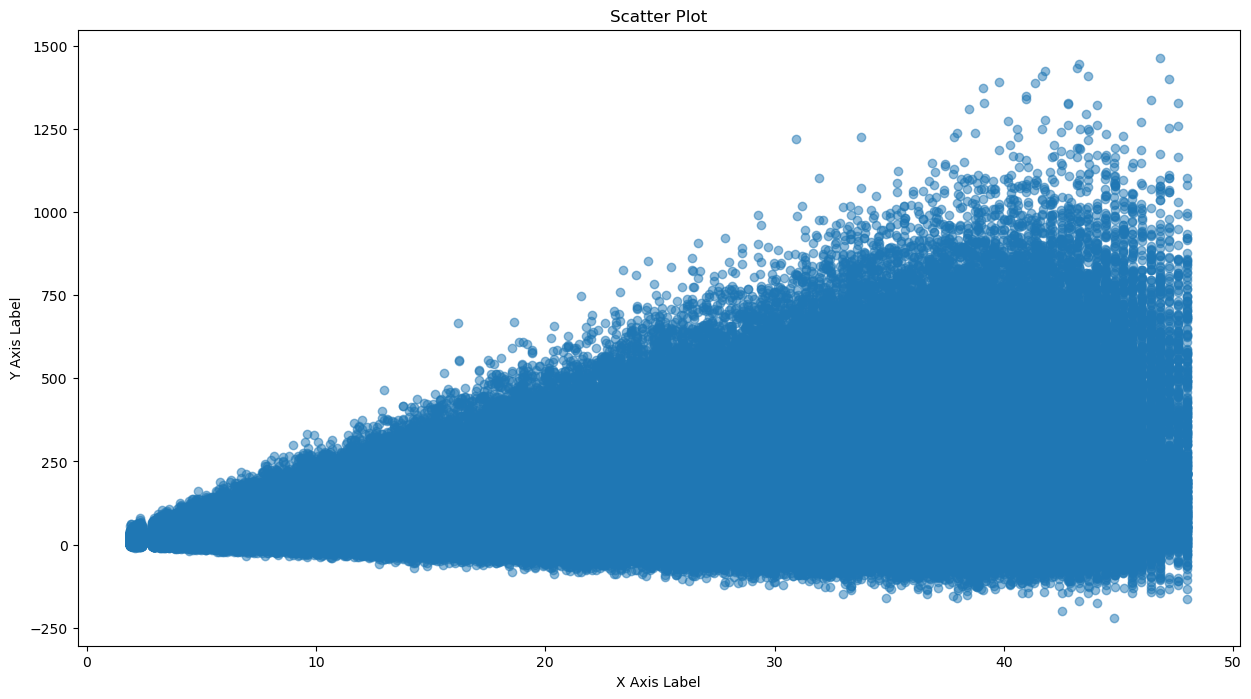

In [372]:
x = cab_df['KM Travelled']
y = cab_df['Profit']
# Create scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(x, y, alpha=0.5)  # Alpha controls transparency

# Customize the plot
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Scatter Plot')


the scatter plot shows that there is a correlation between profit margin and Kilometers travelled

-Yellow cab makes the most profit the most of which stems from a New York city. Cumulatively it’s profit is over 729% more than Pink cab

-Investments should target cities with the most users such as New York, San Francisco, Chicago and Los Angeles
There is a seasonality in profit as Autumn and Winter comes top with profitability for both companies

- There is a seasonality in profit as Autumn and Winter comes top with profitability for both companies (hypothesisi)

-YXZ investors should come to terms with the importance of card payment in recent times and invest with Yello cab being the highest facilitators of Card payment.

-Young people up to the age of 40 have the highest repeat cab patronages than those over the age of 40 this enables XYZ understand its strongest market coupled with the fact that the young people out earn the old people.
 
 -Hence, I highly recommend Yellow Cab based on the above points